<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Primary-Objective" data-toc-modified-id="Primary-Objective-1">Primary Objective</a></span></li><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-2">Import Libraries</a></span></li><li><span><a href="#Read-in-the-Data" data-toc-modified-id="Read-in-the-Data-3">Read in the Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4">Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-4.1">Data Dictionary</a></span></li><li><span><a href="#Entity-Relationship-Diagram" data-toc-modified-id="Entity-Relationship-Diagram-4.2">Entity Relationship Diagram</a></span></li><li><span><a href="#Aisles" data-toc-modified-id="Aisles-4.3">Aisles</a></span></li><li><span><a href="#Departments" data-toc-modified-id="Departments-4.4">Departments</a></span></li><li><span><a href="#Orders" data-toc-modified-id="Orders-4.5">Orders</a></span><ul class="toc-item"><li><span><a href="#What-is-the-total-number-of-orders-by-each-user?" data-toc-modified-id="What-is-the-total-number-of-orders-by-each-user?-4.5.1">What is the total number of orders by each user?</a></span></li><li><span><a href="#What-day-of-the-week-receives-the-most-orders?" data-toc-modified-id="What-day-of-the-week-receives-the-most-orders?-4.5.2">What day of the week receives the most orders?</a></span></li><li><span><a href="#What-hours---on-each-day---get-the-most-orders?" data-toc-modified-id="What-hours---on-each-day---get-the-most-orders?-4.5.3">What hours - on each day - get the most orders?</a></span></li><li><span><a href="#What-is-the-distribution-of-the-number-of-days-before-people-reorder?" data-toc-modified-id="What-is-the-distribution-of-the-number-of-days-before-people-reorder?-4.5.4">What is the distribution of the number of days before people reorder?</a></span></li></ul></li><li><span><a href="#Products" data-toc-modified-id="Products-4.6">Products</a></span><ul class="toc-item"><li><span><a href="#Number-of-products-per-Aisle" data-toc-modified-id="Number-of-products-per-Aisle-4.6.1">Number of products per Aisle</a></span></li><li><span><a href="#Number-of-products-per-department" data-toc-modified-id="Number-of-products-per-department-4.6.2">Number of products per department</a></span></li><li><span><a href="#Most-common-words-in-product-names" data-toc-modified-id="Most-common-words-in-product-names-4.6.3">Most common words in product names</a></span></li></ul></li><li><span><a href="#Order-Products-Prior" data-toc-modified-id="Order-Products-Prior-4.7">Order Products Prior</a></span><ul class="toc-item"><li><span><a href="#Which-products-are-re-ordered-the-most-and-which-ones-are-not?" data-toc-modified-id="Which-products-are-re-ordered-the-most-and-which-ones-are-not?-4.7.1">Which products are re-ordered the most and which ones are not?</a></span></li><li><span><a href="#Which-Aisles-have-the-most-re-orders?" data-toc-modified-id="Which-Aisles-have-the-most-re-orders?-4.7.2">Which Aisles have the most re-orders?</a></span></li><li><span><a href="#Which-departments-have-the-most-re-orders?" data-toc-modified-id="Which-departments-have-the-most-re-orders?-4.7.3">Which departments have the most re-orders?</a></span></li></ul></li><li><span><a href="#Summary-of-Data-Insights" data-toc-modified-id="Summary-of-Data-Insights-4.8">Summary of Data Insights</a></span></li></ul></li><li><span><a href="#Resources" data-toc-modified-id="Resources-5">Resources</a></span></li></ul></div>

“The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on 4th September 2019

# Primary Objective

To predict how likely a customer(identified by user_id) is to re-order each of the top 3 products(identified by product_id) from the produce department(identified by department_id)

# Import Libraries

In [189]:
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
import nltk
import os
import warnings
import multiprocessing as mp

from functools import reduce
from PIL import Image
from os import path
from wordcloud import WordCloud, STOPWORDS
from string import punctuation
from nltk.corpus import stopwords
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate

from skopt import gp_minimize

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
os.listdir('./data/')

['products.csv',
 'orders.csv',
 'order_products__train.csv',
 'departments.csv',
 'aisles.csv',
 'order_products__prior.csv']

# Read in the Data

In [3]:
aisles = pd.read_csv('./data/aisles.csv')
departments = pd.read_csv('./data/departments.csv')
orders = pd.read_csv('./data/orders.csv')
order_products_train = pd.read_csv('./data/order_products__train.csv')
order_products_prior = pd.read_csv('./data/order_products__prior.csv')
products = pd.read_csv('./data/products.csv')

# Exploratory Data Analysis

## Data Dictionary
There are 6 separate tables that make up our data.  
1) orders  
2) products  
3) aisles  
4) departments  
5) order_products_prior  
6) order_products_train  

Below is the definition of the columns within those tables

`orders` (3.4m rows, 206k users):
* `order_id`: order identifier
* `user_id`: customer identifier
* `eval_set`: which evaluation set this order belongs in (see `SET` described below)
* `order_number`: the order sequence number for this user (1 = first, n = nth)
* `order_dow`: the day of the week the order was placed on
* `order_hour_of_day`: the hour of the day the order was placed on
* `days_since_prior`: days since the last order, capped at 30 (with NAs for `order_number` = 1)

`products` (50k rows):
* `product_id`: product identifier
* `product_name`: name of the product
* `aisle_id`: foreign key
* `department_id`: foreign key

`aisles` (134 rows):
* `aisle_id`: aisle identifier
* `aisle`: the name of the aisle

`deptartments` (21 rows):
* `department_id`: department identifier
* `department`: the name of the department

`order_products__SET` (30m+ rows):
* `order_id`: foreign key
* `product_id`: foreign key
* `add_to_cart_order`: order in which each product was added to cart (1 means it was the first item added to cart in that orderid)
* `reordered`: 1 if this product has been ordered by this user in the past, 0 otherwise

where `SET` is one of the four following evaluation sets (`eval_set` in `orders`):
* `"prior"`: orders prior to that users most recent order (~3.2m orders)
* `"train"`: training data supplied to participants (~131k orders)
* `"test"`: test data reserved for machine learning competitions (~75k orders)

Based on the data dictionary, we can understand that    
1) The orders table has a list of all the information for the test, train and prior orders. 

## Entity Relationship Diagram

![](./imgs/entity-relationship-diagram.png)

## Aisles

In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
aisles.shape

(134, 2)

Nothing special to notice here. This is simply a list of Isles. There are a total of 134 unique aisle names

## Departments

In [6]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
departments.shape

(21, 2)

Nothing special to notice here. This is simply a list of departments. There are a total of 21 unique department names

## Orders
The orders table has every order made by each unique user and details about those orders. Importantly, the orders table has data for the train, test and prior data mashed together, hence it would be important to separate the test data before we continue

In [8]:
orders_learning = orders[orders['eval_set'] == 'train']
orders_prior = orders[orders['eval_set'] == 'prior']
orders_test = orders[orders['eval_set'] == 'test']

The orders_prior table has every historic order of a customer barring the most recent one, while the orders_train table has the latest or most recent order of that customer

In [9]:
orders_prior.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [10]:
orders_learning.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0
82,1094988,9,train,4,6,10,30.0
88,1822501,10,train,6,0,19,30.0
115,1827621,13,train,13,0,21,8.0
129,2316178,14,train,14,2,19,11.0
200,2180313,17,train,41,3,10,30.0


In [11]:
# For ease of use, let's also create a table that is a merger of the train and prior data
orders_non_test = orders[orders['eval_set'] != 'test']
orders_non_test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### What is the total number of orders by each user?

In [12]:
df_num_of_orders_per_user = orders_non_test['user_id'].value_counts().rename_axis('user_id').reset_index(name='counts')

# sanity check

# Sum of counts = Total number of Orders = Total rows in orders_non_test
assert sum(df_num_of_orders_per_user['counts']) == orders_non_test.shape[0]

df_num_of_orders_per_user.tail()

,user_id,counts
206204,169670,3
206205,101420,3
206206,135748,3
206207,28973,3
206208,147929,3


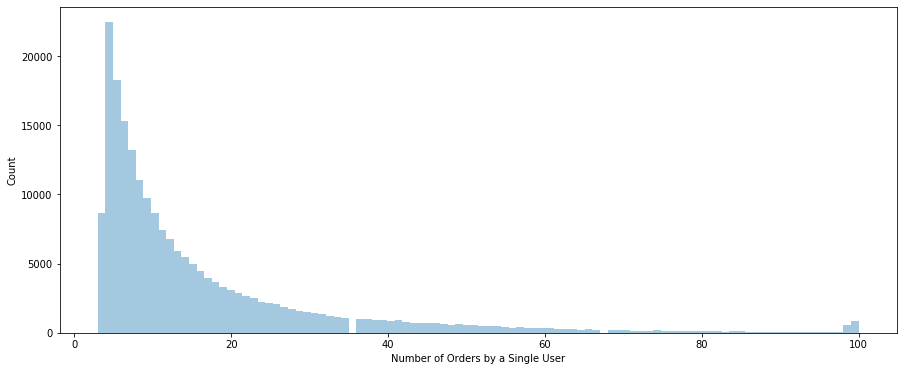

In [13]:
#Let's visualize the same 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.distplot(df_num_of_orders_per_user['counts'], hist = True, kde = False, bins=100)
plt.xlabel('Number of Orders by a Single User')
plt.ylabel('Count')
plt.show()

### What day of the week receives the most orders?

In [14]:
df_num_of_orders_per_day = orders_non_test['order_dow'].value_counts().rename_axis('order_dow').reset_index(name='counts')

# sanity check

# Sum of counts = Total number of Orders = Total rows in orders_non_test
assert sum(df_num_of_orders_per_day['counts']) == orders_non_test.shape[0]

df_num_of_orders_per_day

,order_dow,counts
0,0,585237
1,1,576377
2,2,458074
3,5,443388
4,6,437749
5,3,428087
6,4,417171


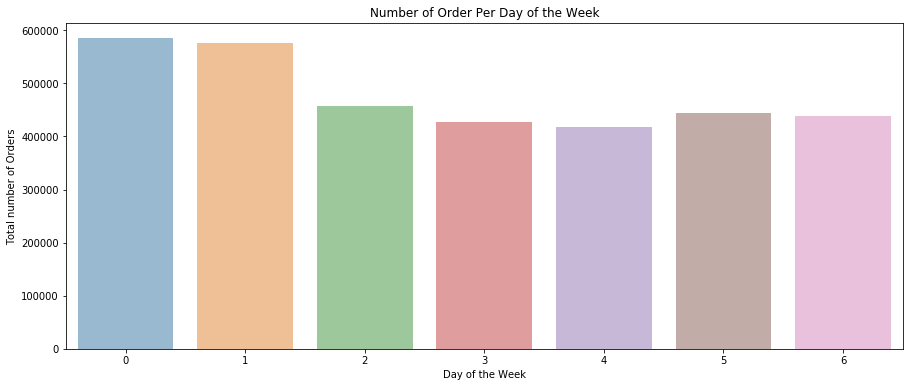

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.catplot(ax = ax, data= df_num_of_orders_per_day, x="order_dow", y="counts", kind="bar", ci = None, alpha = 0.5)
plt.close(2)
plt.title('Number of Order Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total number of Orders')
plt.show()

### What hours - on each day - get the most orders?

In [16]:
# \ allows the statement to continue to the next line
df_num_of_orders_per_day_per_hour = orders_non_test.groupby(['order_dow', 'order_hour_of_day'])\
                                    ['order_dow'].count().to_frame('counts')
df_num_of_orders_per_day_per_hour.reset_index(inplace=True)
df_num_of_orders_per_day_per_hour.head()

,order_dow,order_hour_of_day,counts
0,0,0,3841
1,0,1,2336
2,0,2,1376
3,0,3,933
4,0,4,782


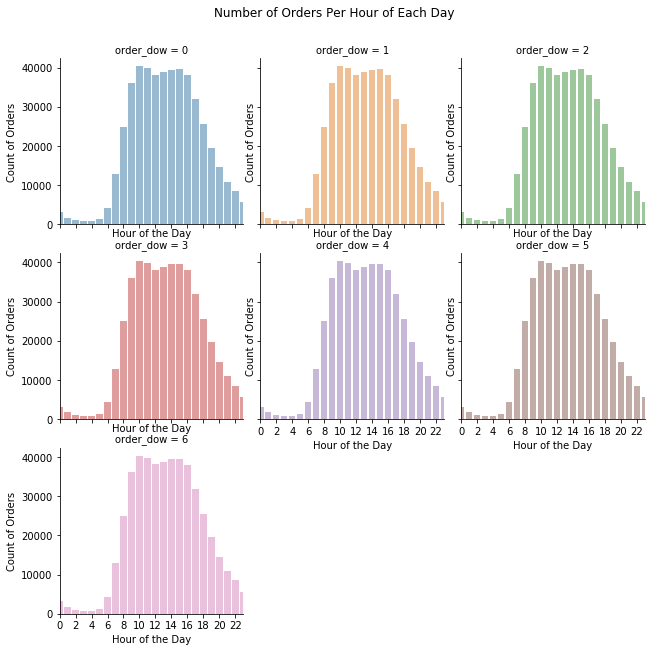

In [17]:
g = sns.FacetGrid(df_num_of_orders_per_day_per_hour, col='order_dow', hue="order_dow", col_wrap=3)
g.map(sns.barplot, data= df_num_of_orders_per_day_per_hour, x = "order_hour_of_day", y = "counts",
      alpha = 0.5, ci = None)
g.set(xlim=(0,23),
      xticks = [0,2,4,6,8,10,12,14,16,18,20,22],
      xticklabels=[0,2,4,6,8,10,12,14,16,18,20,22])
g.set(xlabel='Hour of the Day', ylabel='Count of Orders')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Number of Orders Per Hour of Each Day')
plt.show()

### What is the distribution of the number of days before people reorder?

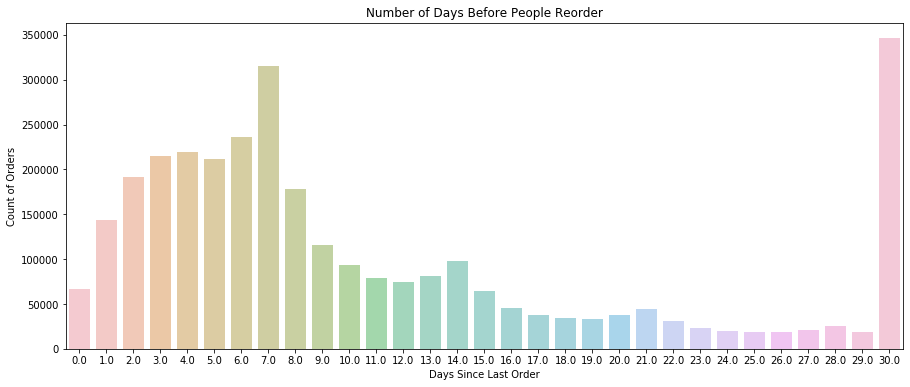

In [18]:
# \ allows the statement to continue to the next line
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
df_number_orders_reorder = orders_non_test.dropna()['days_since_prior_order']\
                           .value_counts().rename_axis('days_since_prior_order').reset_index(name='counts')

sns.barplot(ax = ax, data= df_number_orders_reorder, x = "days_since_prior_order", y = "counts",
            alpha = 0.5, ci = None)
plt.title('Number of Days Before People Reorder')
plt.xlabel('Days Since Last Order')
plt.ylabel('Count of Orders')
plt.show()

## Products

In [19]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [20]:
products.shape

(49688, 4)

### Number of products per Aisle

In [21]:
df_number_of_products_per_aisle = products.groupby('aisle_id')['aisle_id'].count().to_frame('counts')
df_number_of_products_per_aisle.reset_index(inplace = True)
df_number_of_products_per_aisle.head()

,aisle_id,counts
0,1,146
1,2,271
2,3,832
3,4,543
4,5,409


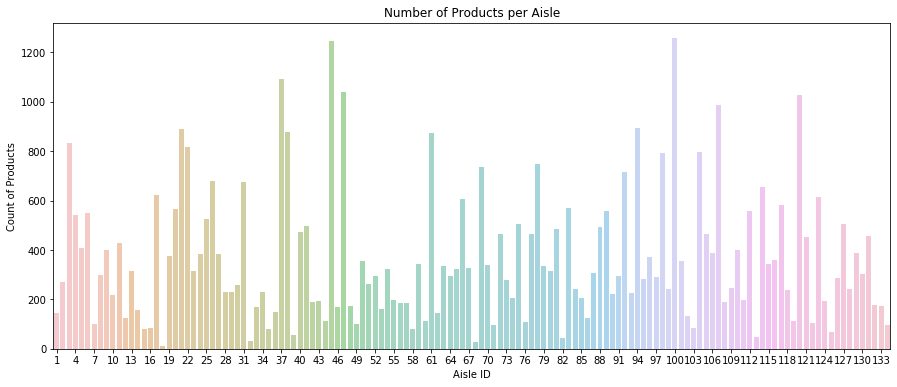

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.barplot(ax = ax, data =df_number_of_products_per_aisle,  x = "aisle_id", y = "counts", alpha = 0.5, ci = None)
plt.xticks(range(0, 134, 3), range(1, 135, 3))
plt.title('Number of Products per Aisle')
plt.xlabel('Aisle ID')
plt.ylabel('Count of Products')
plt.show()

In [23]:
print("The minimum products in an asile:", df_number_of_products_per_aisle['counts'].min())
print("The maximum products in an asile:", df_number_of_products_per_aisle['counts'].max())
print("The average products in an asile:", df_number_of_products_per_aisle['counts'].mean())

The minimum products in an asile: 12
The maximum products in an asile: 1258
The average products in an asile: 370.8059701492537


### Number of products per department

In [24]:
df_number_of_products_per_dep = products.groupby('department_id')['department_id'].count().to_frame('counts')
df_number_of_products_per_dep.reset_index(inplace = True)
df_number_of_products_per_dep.head()

,department_id,counts
0,1,4007
1,2,548
2,3,1516
3,4,1684
4,5,1054


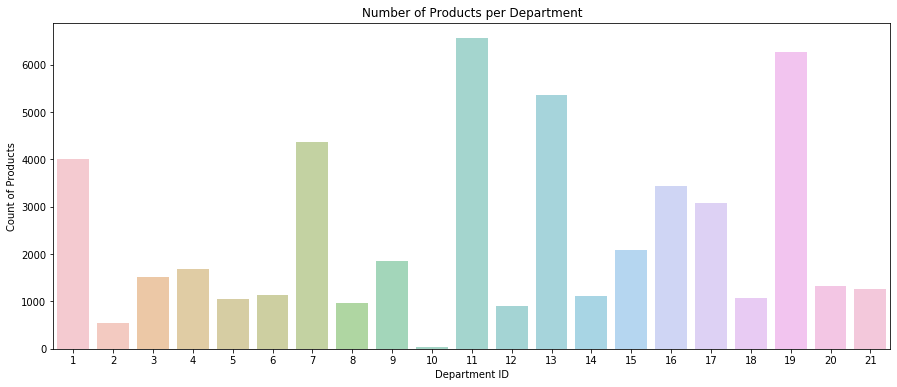

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.barplot(ax = ax, data =df_number_of_products_per_dep,  x = "department_id", y = "counts", alpha = 0.5, ci = None)
plt.title('Number of Products per Department')
plt.xlabel('Department ID')
plt.ylabel('Count of Products')
plt.show()

In [26]:
print("The minimum products in an department:", df_number_of_products_per_dep['counts'].min())
print("The maximum products in an department:", df_number_of_products_per_dep['counts'].max())
print("The average products in an department:", df_number_of_products_per_dep['counts'].mean())

The minimum products in an department: 38
The maximum products in an department: 6563
The average products in an department: 2366.095238095238


### Most common words in product names

In [27]:
# Convert the names to lower case, split the names by whitespace,
# stack the resulting series and then count the frequency
df_product_name_word_counts = products.product_name.str.lower().str.split(expand = True).stack().value_counts()

# convert to a dataframe and rename the column
df_product_name_word_counts = df_product_name_word_counts.to_frame('counts')

# adjust the index
df_product_name_word_counts.reset_index(inplace = True)

# Rename the column  "index" to "word"
df_product_name_word_counts = df_product_name_word_counts.rename(columns = {'index' : 'word'})

# Drop stop words like (with, and, the, etc) using nltk's stopword list
df_product_name_word_counts = df_product_name_word_counts[~df_product_name_word_counts['word'].isin(stopwords.words('english'))]

# Drop any special characters or punctuation
df_product_name_word_counts = df_product_name_word_counts[~df_product_name_word_counts['word'].isin(set(punctuation))]

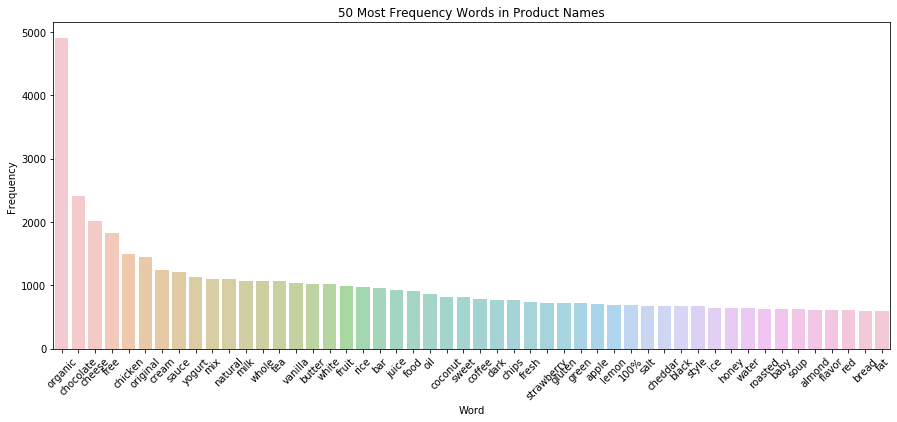

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.barplot(ax = ax, data =df_product_name_word_counts[0:50],  x = "word", y = "counts", alpha = 0.5, ci = None)
plt.xticks(rotation=45)
plt.title('50 Most Frequency Words in Product Names')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


Alternatively, we could also visualize this in a more fun word cloud format. 

In [29]:
product_names_text = " ".join(products.product_name.str.lower().str.split(expand = True).stack())

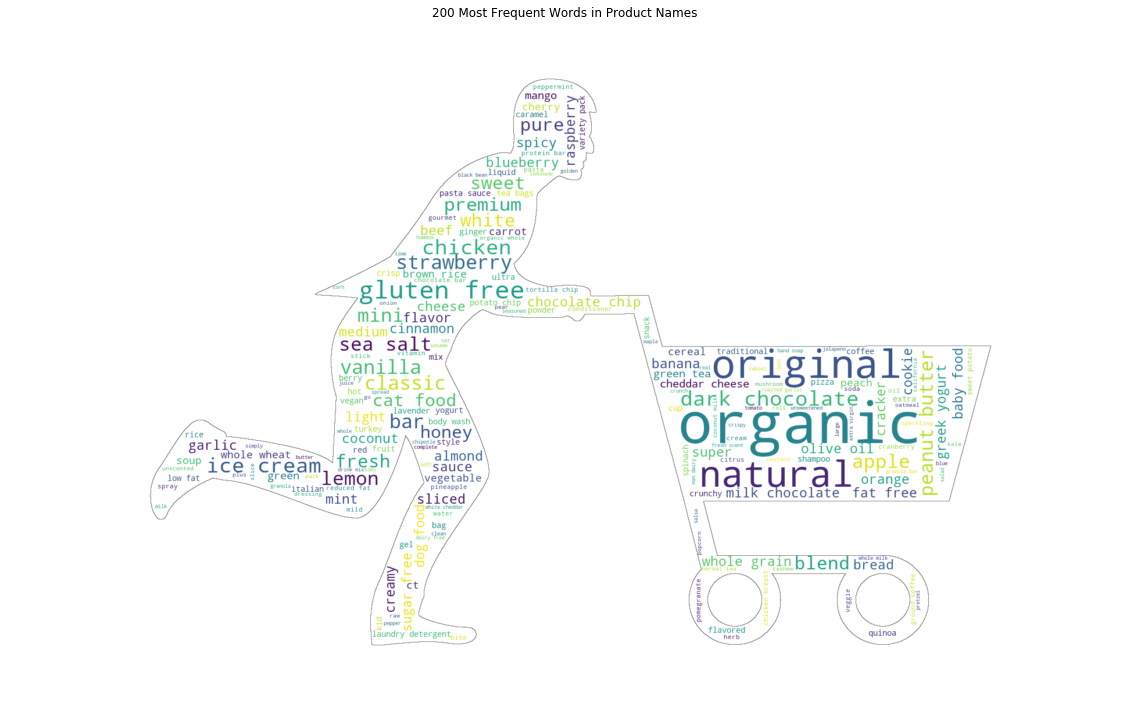

In [30]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
shopping_cart_mask = np.array(Image.open(path.join(d, "imgs/shopping_cart_mask.png")))

stopwords_1 = set(STOPWORDS).union(set(punctuation))

wc = WordCloud(background_color="white", max_words=200, mask=shopping_cart_mask,
               stopwords=stopwords_1, contour_width=0.5, contour_color='grey').generate(product_names_text)

wc.to_file(path.join(d, "imgs/shopping_cart_word_cloud.png"))

plt.figure(figsize = (20,12.5))
plt.imshow(wc, interpolation='bilinear', aspect='auto')
plt.title('200 Most Frequent Words in Product Names')
plt.axis("off")
plt.show()

## Order Products Prior
This table showcases the products ordered in each order, and the sequence in which each of the products were added to cart. Since this is the prior version of the table, all the orders in this table represent all the historic orders for a user barring the most recent one which is in the order_products_train table

In [31]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### Which products are re-ordered the most and which ones are not?

In [32]:
frequency_products = order_products_prior.groupby(['product_id', 'reordered'])['product_id'].count().to_frame('count')
frequency_products.reset_index(inplace = True)
frequency_products.head()

# Let's add in the product name to give some context to our results
frequency_products  = pd.merge(frequency_products, products, on = 'product_id', how = 'inner')

In [33]:
frequency_products_reordered = frequency_products[frequency_products['reordered'] == 1].sort_values(by=['count'], ascending = False)
frequency_products_reordered.head()

,product_id,reordered,count,product_name,aisle_id,department_id
47529,24852,1,398609,Banana,24,4
25170,13176,1,315913,Bag of Organic Bananas,24,4
40416,21137,1,205845,Organic Strawberries,24,4
41873,21903,1,186884,Organic Baby Spinach,123,4
90247,47209,1,170131,Organic Hass Avocado,24,4


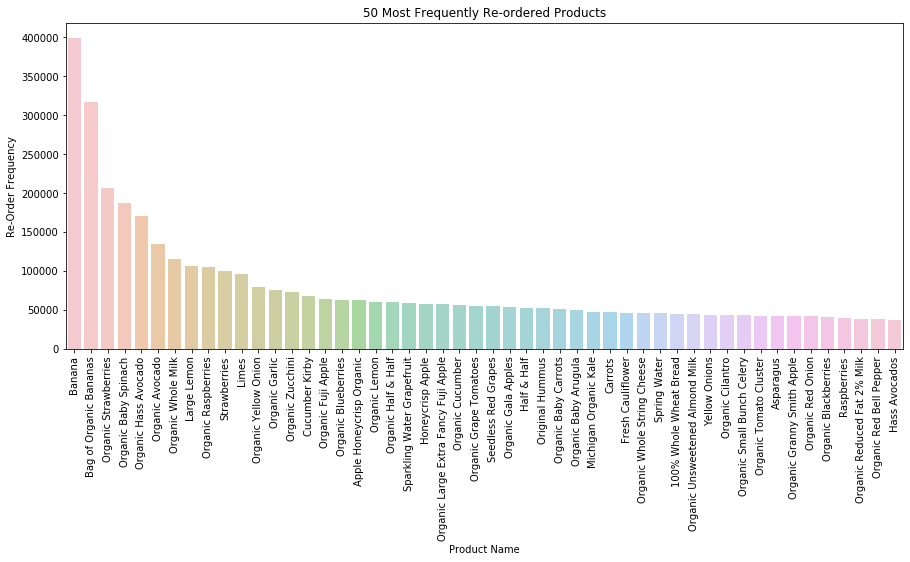

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.barplot(ax = ax, data =frequency_products_reordered[0:50],  x = "product_name", y = "count", alpha = 0.5, ci = None)
plt.xticks(rotation=90)
plt.title('50 Most Frequently Re-ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Re-Order Frequency')
plt.show()

In [35]:
frequency_products_not_reordered = frequency_products[frequency_products['reordered'] == 0].sort_values(by=['count'], ascending = False)
frequency_products_not_reordered.head()

,product_id,reordered,count,product_name,aisle_id,department_id
47528,24852,0,73956,Banana,24,4
25169,13176,0,63537,Bag of Organic Bananas,24,4
40415,21137,0,58838,Organic Strawberries,24,4
41872,21903,0,55037,Organic Baby Spinach,123,4
91044,47626,0,46402,Large Lemon,24,4


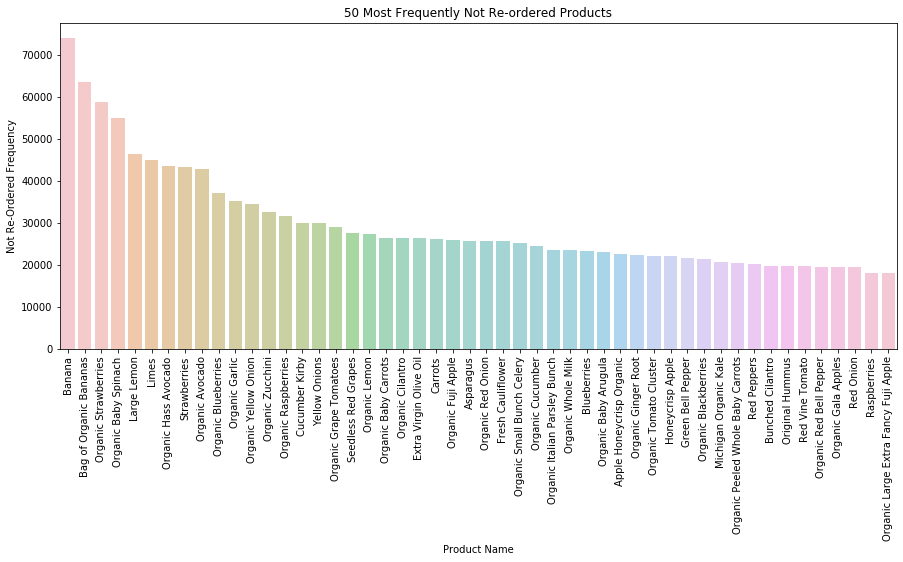

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.barplot(ax = ax, data =frequency_products_not_reordered[0:50],  x = "product_name", y = "count", alpha = 0.5, ci = None)
plt.xticks(rotation=90)
plt.title('50 Most Frequently Not Re-ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Not Re-Ordered Frequency')
plt.show()

### Which Aisles have the most re-orders?

In [37]:
frequency_aisles = frequency_products.groupby(['aisle_id', 'reordered'])['count'].sum().to_frame('count')
frequency_aisles.reset_index(inplace = True)

# Let's add the aisle names to give some context to our results
frequency_aisles = pd.merge(frequency_aisles, aisles, on = 'aisle_id', how = 'inner')

frequency_aisles.head()

,aisle_id,reordered,count,aisle
0,1,0,29016,prepared soups salads
1,1,1,42912,prepared soups salads
2,2,0,42126,specialty cheeses
3,2,1,40365,specialty cheeses
4,3,0,183464,energy granola bars


In [38]:
frequency_aisles_reordered = frequency_aisles[frequency_aisles['reordered'] == 1].sort_values(by=['count'], ascending = False)
frequency_aisles_reordered.head()

,aisle_id,reordered,count,aisle
47,24,1,2615469,fresh fruits
165,83,1,2032172,fresh vegetables
245,123,1,1127177,packaged vegetables fruits
239,120,1,997018,yogurt
167,84,1,696264,milk


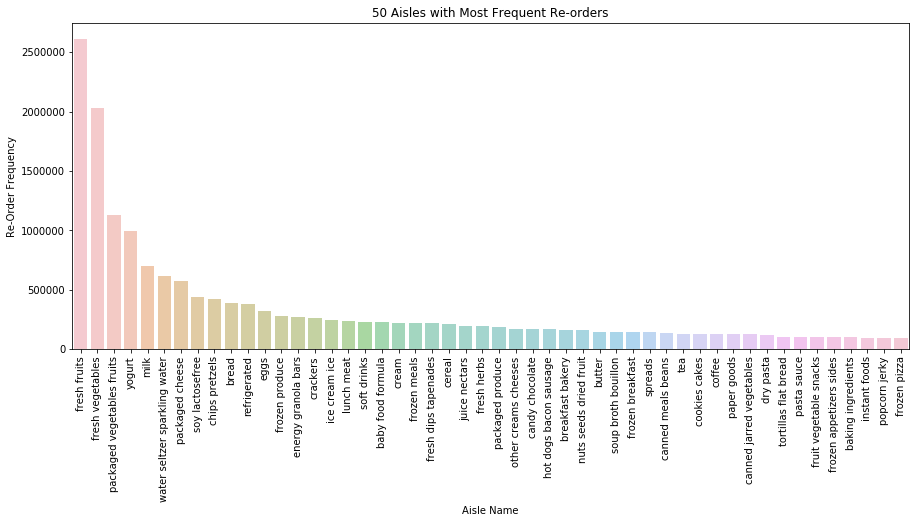

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.barplot(ax = ax, data =frequency_aisles_reordered[0:50],  x = "aisle", y = "count", alpha = 0.5, ci = None)
plt.xticks(rotation=90)
plt.title('50 Aisles with Most Frequent Re-orders')
plt.xlabel('Aisle Name')
plt.ylabel('Re-Order Frequency')
plt.show()

In [40]:
frequency_aisles_not_reordered = frequency_aisles[frequency_aisles['reordered'] == 0].sort_values(by=['count'], ascending = False)
frequency_aisles_not_reordered.head()

,aisle_id,reordered,count,aisle
164,83,0,1385849,fresh vegetables
46,24,0,1026719,fresh fruits
244,123,0,638136,packaged vegetables fruits
238,120,0,455325,yogurt
40,21,0,406380,packaged cheese


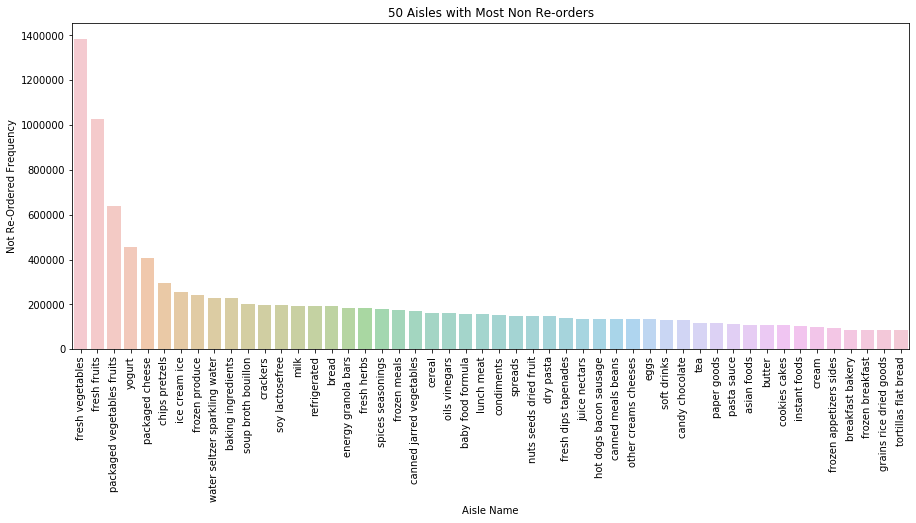

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.barplot(ax = ax, data =frequency_aisles_not_reordered[0:50],  x = "aisle", y = "count", alpha = 0.5, ci = None)
plt.xticks(rotation=90)
plt.title('50 Aisles with Most Non Re-orders')
plt.xlabel('Aisle Name')
plt.ylabel('Not Re-Ordered Frequency')
plt.show()

### Which departments have the most re-orders?

In [42]:
frequency_departments = frequency_products.groupby(['department_id', 'reordered'])['count'].sum().to_frame('count')
frequency_departments.reset_index(inplace = True)

# Let's add the department names for context
frequency_departments = pd.merge(frequency_departments, departments, on = 'department_id', how = 'inner')
frequency_departments.head()

,department_id,reordered,count,department
0,1,0,1024542,frozen
1,1,1,1211890,frozen
2,2,0,21485,other
3,2,1,14806,other
4,3,0,437599,bakery


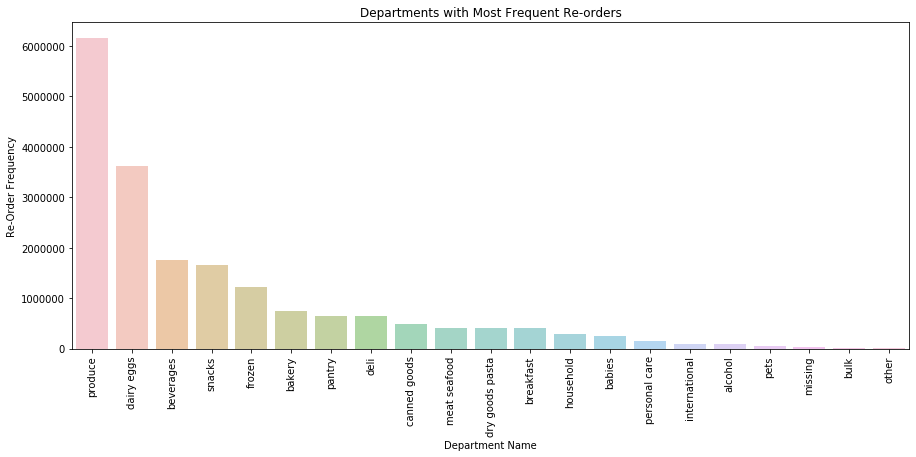

In [43]:
frequency_departments_reordered = frequency_departments[frequency_departments['reordered'] == 1].sort_values(by=['count'], ascending = False)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.barplot(ax = ax, data =frequency_departments_reordered,  x = "department", y = "count", alpha = 0.5, ci = None)
plt.xticks(rotation=90)
plt.title('Departments with Most Frequent Re-orders')
plt.xlabel('Department Name')
plt.ylabel('Re-Order Frequency')
plt.show()

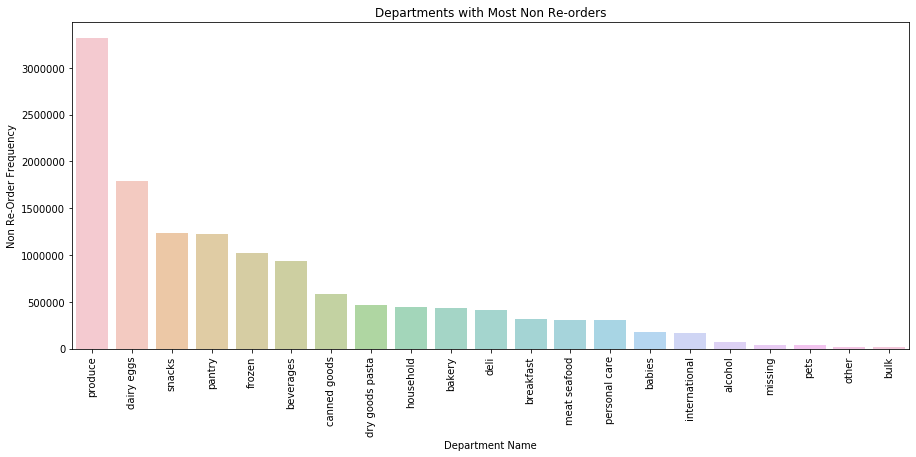

In [44]:
frequency_departments_non_reordered = frequency_departments[frequency_departments['reordered'] == 0].sort_values(by=['count'], ascending = False)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.barplot(ax = ax, data =frequency_departments_non_reordered,  x = "department", y = "count", alpha = 0.5, ci = None)
plt.xticks(rotation=90)
plt.title('Departments with Most Non Re-orders')
plt.xlabel('Department Name')
plt.ylabel('Non Re-Order Frequency')
plt.show()

## Summary of Data Insights
* There are 21 departments and 134 aisles in the insta-cart data 
* 49,688 products make up the insa-cart catalog and are distributed across its departments and aisles  
* The number of products in an aisle ranges from 12 to 1258 with the average number of product in an aisle being 370   
* On average there are 2366 products in a department with the lowest having 38 products (department # 10) and the highest having 6563 (department # 11) 
* Organic seems to be the most common word in product names and leads me to believe that insta cart sells a lot of organic products. Chocolate, Cheese, Chicken and Original are also among the most common words in product names  
* The instacart data base has users that have ordered as few as three times from the platform, and as much as a 100 times. However the distribution of the orders is heavily skewed to the right, with most people having ordered up to 40 times or less. While we are unaware of the time duration of this data, it would be interesting to explore why customers order more or less often.  
* The orders are evenly distributed over the week, except a slight increase over the weekends(Saturday and Sunday), which would be expected.  
* Furthermore, a bulk of there orders come between 8am and 10pm and follow the same pattern for every day of the week  
* The data is censored at 30+ and there are a large number of users that are reported as ordering at the 30 day mark. However, since censoring at 30 implies that users that ordered at the 30 day mark or even after are treated the same way and recorded in the data as 30. This creates an artificial spike in the data that does not add any interpretive value.  
* The distribution of the number of days before people re-order is skewed to the right with a majority or the re-orders coming between 0-15 days from their previous order. This would make sense if the quantities of the things people order would usually be consumed within 15 days of them buying it.  
* Furthermore, there are also spikes in the data around the 7, 14, 21 and 28 day mark that diverge from the trend of the data. This could potentially represent peoples habits of shopping for an item on a weekly, bi-weekly, tri-weekly or monthly basis.   
* Looking at the orders, it appears that Organic products are heavily featured amongst the re-ordered items, with Bag of Organic Bananas, Organic  Strawberries and Organic Baby Spinach being among the  top 5 most re-ordered products.  
* The aisles for Fresh Fruits and Fresh Vegetables account for the most number of re-orders  
* Amongst the departments, Produce is the one that is most frequently re-ordered from, with dairy and eggs being  second.  

# Resources
* The data set: “The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on 1st September 2019
* Word cloud package: https://github.com/amueller/word_cloud#examples
* How to Parallelize: https://www.machinelearningplus.com/python/parallel-processing-python/